<a href="https://colab.research.google.com/github/UN-GCPDS/curso_IA_CHEC/blob/main/Modulo4/cuadernos/MobileNetV2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![Logo UNAL CHEC](https://github.com/UN-GCPDS/curso_IA_CHEC/blob/main/logo_unal_chec.jpg?raw=1)

# **MÓDULO 4: FUNDAMENTOS DE VISIÓN POR COMPUTADOR**

## Descripción:
Estudio de los principios básicos de captura de imágenes y video, manejo de cámaras (RGB y por termografía) y redes neuronales convolucionales.

### **Profesor - Sesión 7:** Juan Bernardo Gómez Mendoza
### **Monitores - Sesión 7:** Juan Camilo Lugo Rojas y Lucas Miguel Iturriago Salas

#### Configuración del entorno

In [1]:
# @title
%%capture
!pip install --upgrade tensorflow==2.15.0 tensorflow-hub keras==2.15.0

import os
import cv2
import requests
import numpy as np
import tensorflow as tf

import keras
from keras.applications.mobilenet_v2 import MobileNetV2
from keras.applications.mobilenet_v2 import preprocess_input, decode_predictions

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from IPython.display import Image, display

def descargar_imagen(url_de_la_imagen):
    """
    Descarga una imagen de una URL y la guarda en la ruta especificada.

    Parámetros:
    url_de_la_imagen (str): La URL de la imagen que se desea descargar.

    Retorna:
    None
    """

    # Especifica la ruta y el nombre del archivo donde deseas guardar la imagen
    ruta_de_descarga = "/content/image_descargada" + ".jpg"

    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'
    }

    # Realiza una solicitud GET para descargar la imagen
    respuesta = requests.get(url_de_la_imagen, headers=headers, allow_redirects=True)

    # Verifica si la solicitud fue exitosa (código de estado 200)
    if respuesta.status_code == 200:
        # Abre un archivo en modo binario para escribir los datos de la imagen
        with open(ruta_de_descarga, "wb") as archivo:
            # Escribe los datos de la imagen en el archivo
            archivo.write(respuesta.content)
        # Cargar la imagen
        imagen_descargada = mpimg.imread(ruta_de_descarga)
        # Mostrar la imagen
        plt.figure(figsize=(7, 6))  # Cambia el tamaño de la figura (ancho, alto)
        plt.imshow(imagen_descargada)
        plt.title('Imagen descargada')
        plt.axis('off')  # Ocultar los ejes
        plt.show()
    else:
        print("Error al descargar la imagen.")

def cargar_imagen(ruta):
    """
    Carga una imagen de una ruta especificada, la reescala y la normaliza.

    Parámetros:
    ruta (str): La ruta del archivo de la imagen que se desea cargar.

    Retorna:
    imagen_dimensionada (numpy.ndarray): La imagen cargada, reescalada, normalizada y dimensionada adecuadamente.
    """

    # Carga la imagen de la ruta especificada
    imagen = cv2.imread(ruta)

    # Pasar al espacio de color RGB
    imagen = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)

    # Reescala la imagen a un tamaño de 224x224
    imagen_reescalada = cv2.resize(imagen, (224, 224))

    # Normaliza la imagen dividiendo por 255.0
    imagen_normalizada = imagen_reescalada / 255.0

    # Expandir las dimensiones de la imagen
    imagen_dimensionada = np.expand_dims(imagen_normalizada, axis=0)

    return imagen_dimensionada

def prediccion(imagen):
    """
    Realiza una predicción utilizando el modelo sobre la imagen proporcionada y muestra la imagen con la clase predicha.

    Parámetros:
    imagen (numpy.ndarray): La imagen a la que se le va a realizar la predicción.

    Retorna:
    str: La clase predicha para la imagen.
    """

    resultados = modelo.predict(imagen)

    # Mostrar la imagen
    plt.figure(figsize=(9, 5))  # Cambia el tamaño de la figura (ancho, alto)
    plt.imshow(imagen_descargada[0])
    plt.title(f'Clase predicha para esta imagen: {decode_predictions(resultados, top=1)[0][0][1]}')
    plt.axis('off')  # Ocultar los ejes
    plt.show()

    return decode_predictions(resultados, top=1)[0][0][1]

### **Objetivo**

Aplicar una red convolucional previamente entrenada para la clasificación de imágenes para evidenciar su rendimiento en imágenes diversas de la web.

### **MobileNetV2**

<img src="https://www.researchgate.net/publication/366980589/figure/fig3/AS:11431281112076831@1673310775707/Schematic-diagram-of-Mobilenet-V2-network-structure.jpg" alt="Arquitectura MobileNetV2" >

MobileNetV2 es una arquitectura de red neuronal convolucional diseñada para dispositivos móviles y de baja potencia, que utiliza bloques de convolución de profundidad separable para reducir la cantidad de parámetros y mejorar la eficiencia computacional. Introduce un nuevo tipo de bloque llamado "inverted residual block", que combina la convolución de 1x1 para aumentar la dimensionalidad con una convolución de profundidad, optimizando así el rendimiento y la precisión en tareas de clasificación de imágenes.

#### **ImageNet: Datos sobre la que fue entrenada**

<img src="https://blog.roboflow.com/content/images/2021/06/image-18.png" alt="BAse de datos ImageNet" >

ImageNet es un extenso conjunto de datos de imágenes utilizado principalmente para entrenar y evaluar modelos de reconocimiento visual. Contiene más de 14 millones de imágenes etiquetadas, organizadas en más de 20,000 categorías, lo que proporciona una rica diversidad de objetos y escenas.

#### **Carga del modelo**

In [2]:
# Usando la biblioteca se carga MobiletNetV2 entrenada para ImageNet
modelo = MobileNetV2(weights='imagenet')

14536120/14536120 [==============================] - 1s 0us/step


### **Predicción sobre imagen de la web**

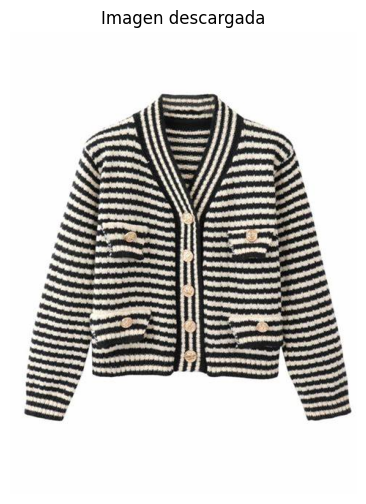

In [3]:
# Mediante una función se descarga una imagen de la web usando su URL
descargar_imagen("https://th.bing.com/th/id/OIP.kkE-3xIe8JkzV1s_BhE6QgHaJ4?rs=1&pid=ImgDetMain")

In [4]:
# Se convierte la imagen a un arreglo de Numpy con dimensiones:
# (1,224,24,3) = (numero de imagenes, alto, ancho, 3 canales; "RGB")
imagen_descargada = cargar_imagen("/content/image_descargada.jpg")

35363/35363 [==============================] - 0s 0us/step


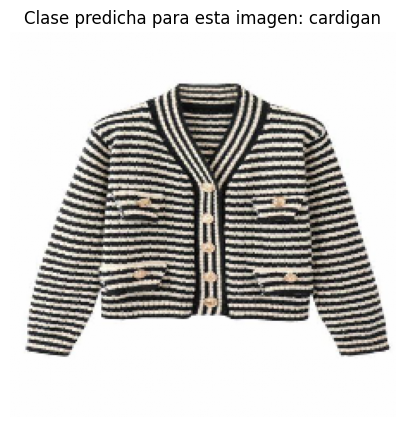

'cardigan'

In [5]:
# Se realiza la inferencia del modelo usando la imagen descargada y se muestra la clasificación que estimó
prediccion(imagen_descargada)